# TCS RIO 125 Internship Project

This notebook is the part of my TCS iON Internship Project. The main aim of the project is "Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset". In this notebook I develop a model to predict the price range in which the phone belongs given the input features and determine how each feature affects the price.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Reading the Dataset

### About the dataset:

I downloaded this dataset from [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification). This dataset is divided into 2 parts namely `train` and `test`. The `train` dataset contains information about the various features of the mobiles and also the price range to train the model. The `test` dataset contains only the input features and we have to predict price range using them. The metadata is as follows:

`battery_power` : Total energy a battery can store in one time measured in mAh

`blue` : Has bluetooth or not

`clock_speed` : Speed at which microprocessor executes instructions

`dual_sim` : Has dual sim support or not

`fc` : Front Camera mega pixels

`four_g` : Has 4G or not

`int_memory` : Internal Memory in Gigabytes

`m_dep` : Mobile Depth in cm

`mobile_wt` : Weight of mobile phone

`n_cores` : Number of cores of processor

`pc` : Primary Camera mega pixels

`px_height` : Pixel Resolution Height

`px_width` : Pixel Resolution Width

`ram` : Random Access Memory in Mega Bytes

`sc_h` : Screen Height of mobile in cm

`sc_w` : Screen Width of mobile in cm

`talk_time` : Longest time that a single battery charge will last when you are

`three_g` : Has 3G or not

`touch_screen` : Has touch screen or not

`wifi` : Has wifi or not

`price_range` : This is the target variable with value of 0 (very low cost), 1 (low cost), 2 (medium cost) and 3 (high cost).

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train_df.shape

(2000, 21)

The `train` dataset has `2000` rows and `21` columns.

In [6]:
test_df.shape

(1000, 21)

The `test` dataset has `1000` rows and `21` columns.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

We can see that both the datasets do not have any missing values.

In [9]:
train_df.duplicated().sum()

0

In [10]:
test_df.duplicated().sum()

0

Both the dataset do not have any duplicate data either.

## Exploratory Data Analysis

In this step we will explore the data a bit more in depth to get various insights and information about the data. Our features can be divided into 2 types: `categorical` and `numerical`.

`categorical` variables are discrete and take only a handful of values whereas `numerical` variables are continuos and can take any value in the interval of its range.

In [11]:
cat_variables = ['blue', 'dual_sim', 'four_g',
                 'three_g', 'touch_screen', 'wifi', 'price_range']
num_variables = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

Let us check the frequency distribution of the categorical variables.

In [12]:
for column in cat_variables:
    value_counts = train_df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print("-----------------------")

Column: blue
0    1010
1     990
Name: blue, dtype: int64
-----------------------
Column: dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64
-----------------------
Column: four_g
1    1043
0     957
Name: four_g, dtype: int64
-----------------------
Column: three_g
1    1523
0     477
Name: three_g, dtype: int64
-----------------------
Column: touch_screen
1    1006
0     994
Name: touch_screen, dtype: int64
-----------------------
Column: wifi
1    1014
0     986
Name: wifi, dtype: int64
-----------------------
Column: price_range
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
-----------------------


One thing we can observe is that all the categorical features have uniform distribution except `three_g`. We can see that more than 2/3<sup>rd</sup> of the dataset has 3G support.

Next we look at the frequency distribution with respect to `price_range` to see if any categorical feature is highly correlated to it.

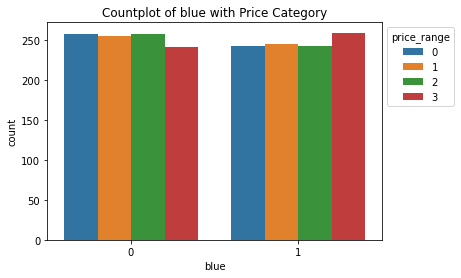

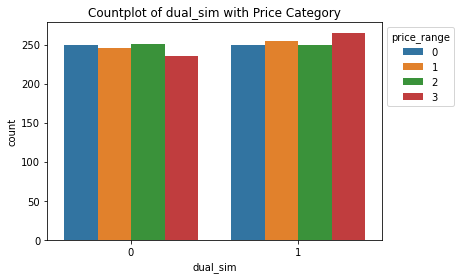

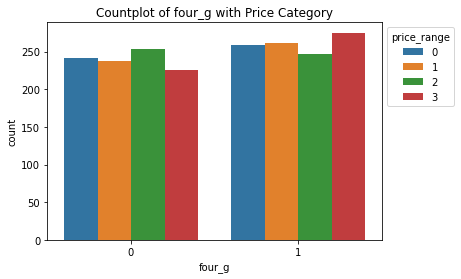

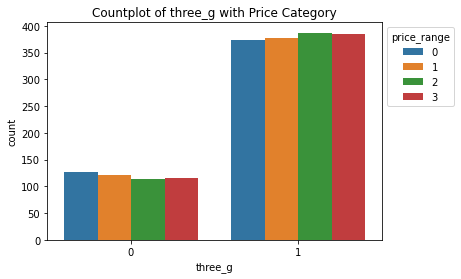

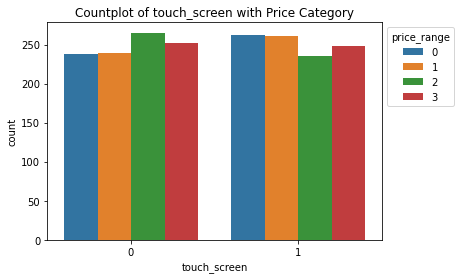

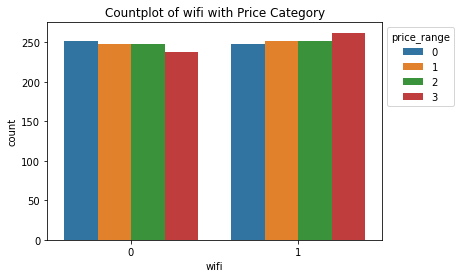

In [13]:
for column in cat_variables:
    if column != 'price_range':
        ax = sns.countplot(data=train_df, x=column, hue='price_range')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        plt.title(f'Countplot of {column} with Price Category')
        plt.show()

We can see that the distribution is fairly uniform for each `price_range`. Next we look at the box plots of numerical variables with respect to each `price_range` to see if anything is highly correlated to it.

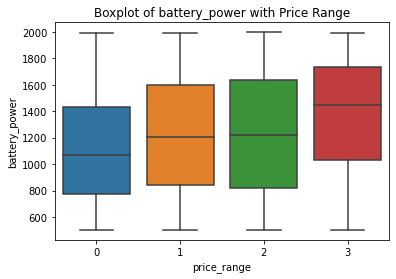

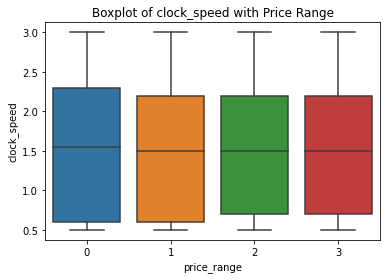

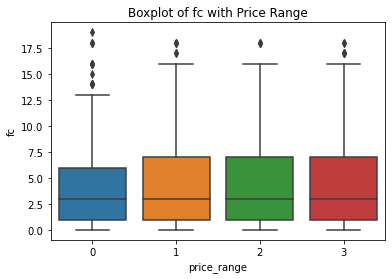

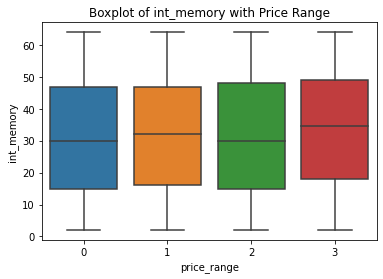

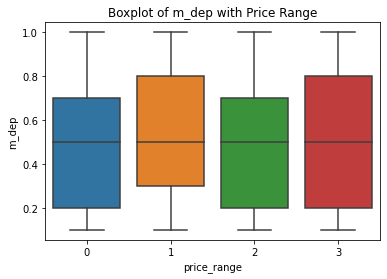

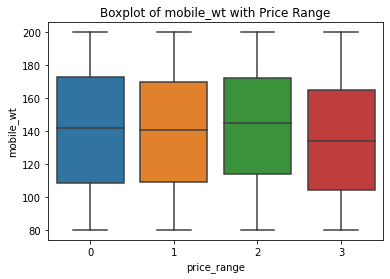

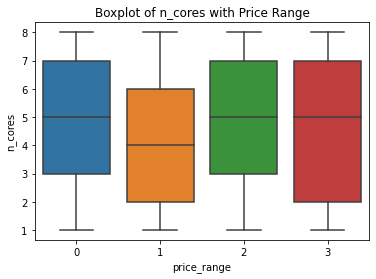

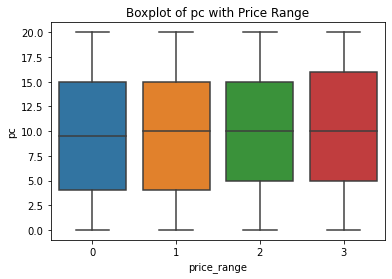

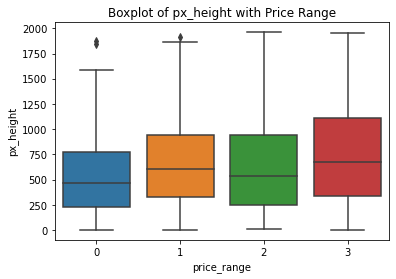

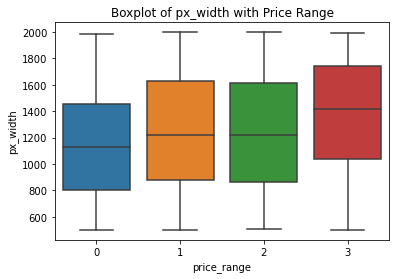

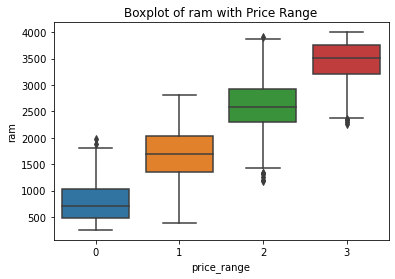

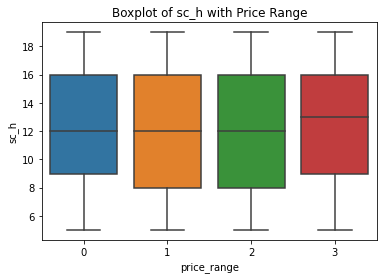

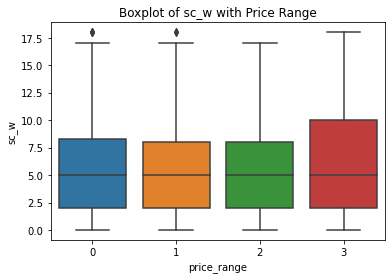

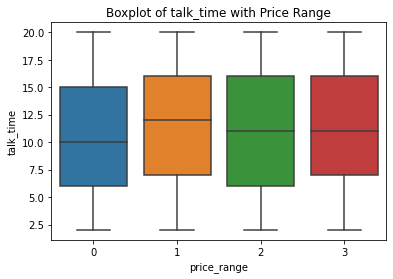

In [14]:
for column in num_variables:
    sns.boxplot(data=train_df, y=column, x='price_range')
    plt.title(f'Boxplot of {column} with Price Range')
    plt.show()

All of the distributions are more or less equal except for `ram`. We can observe that as `price_range` increases `ram` also increases sharply.

## Feature Engineering & Feature Scaling

In this step we will try to see the correlations of features with one another and decide whether to make any changes to the data. We will also try to make the data ready for model training. First, let us look at the correlation plot to check for any high correlations.

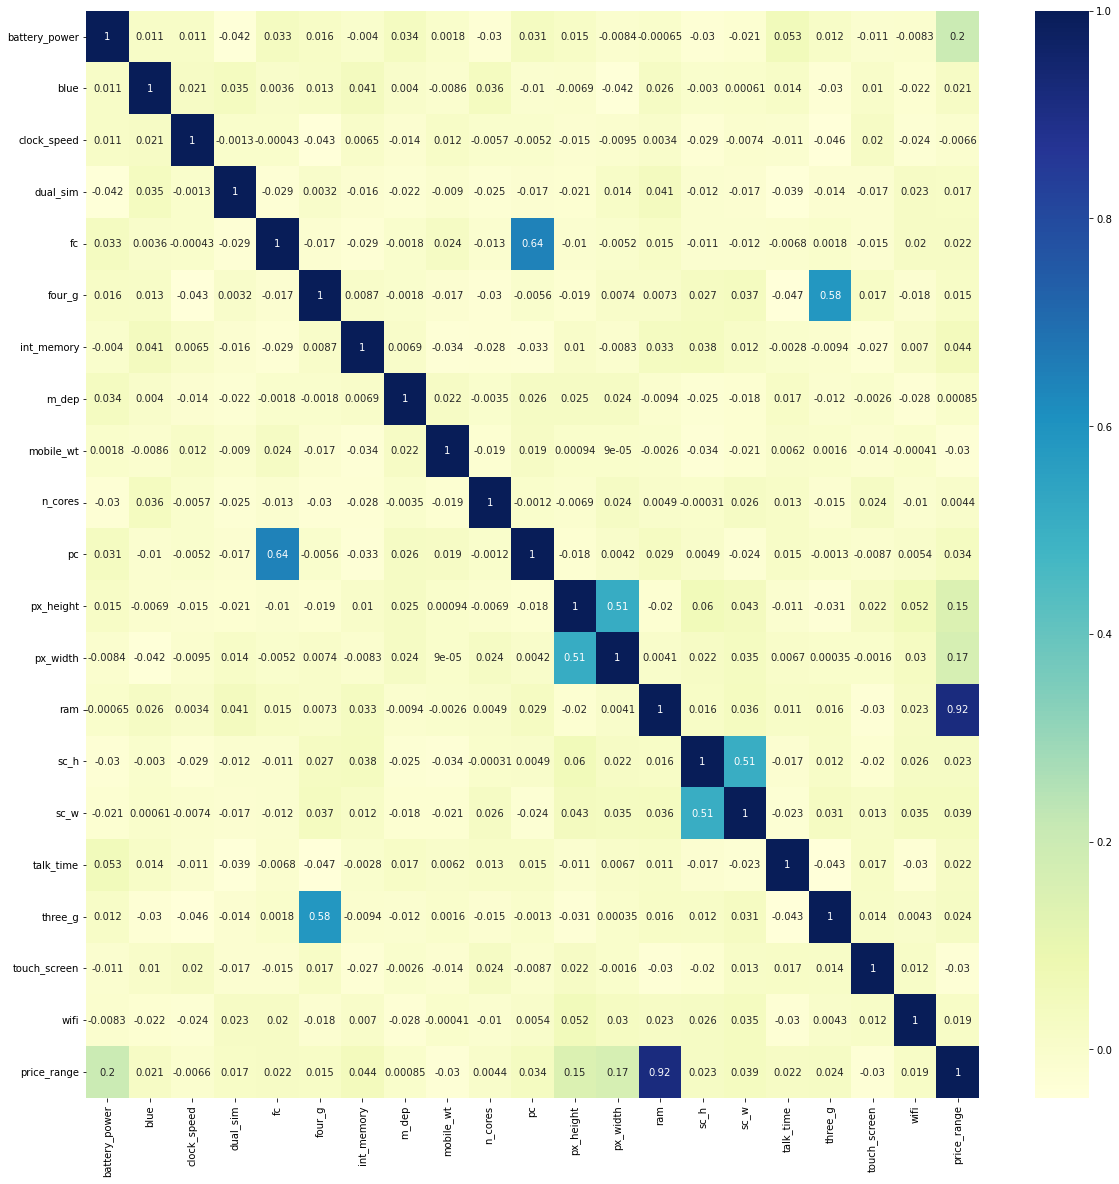

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

We observe that `px_height` and `px_width` are highly correlated, also, `sc_h` and `sc_w`. It is natural since if we have a mobile which has high length, to compensate for that it should also have high width otherwise the mobile will be very difficult to use. Hence I replace both of these pairs with their corresponding areas.

In [16]:
train_df['px_area'] = train_df['px_height'] * train_df['px_width']
test_df['px_area'] = test_df['px_height'] * test_df['px_width']

train_df.drop(['px_height', 'px_width'], axis=1, inplace=True)
test_df.drop(['px_height', 'px_width'], axis=1, inplace=True)

In [17]:
train_df['sc_area'] = train_df['sc_h'] * train_df['sc_w']
test_df['sc_area'] = test_df['sc_h'] * test_df['sc_w']

train_df.drop(['sc_h', 'sc_w'], axis=1, inplace=True)
test_df.drop(['sc_h', 'sc_w'], axis=1, inplace=True)

In [18]:
num_variables.remove('px_height')
num_variables.remove('px_width')
num_variables.remove('sc_h')
num_variables.remove('sc_w')

num_variables.append('px_area')
num_variables.append('sc_area')
num_variables

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'ram',
 'talk_time',
 'px_area',
 'sc_area']

In [19]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,15120,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,1799140,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,2167308,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,2171776,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,1464096,16


In [20]:
new_column_order = list(train_df.columns.drop('price_range')) + ['price_range']
train_df = train_df[new_column_order]

train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,px_area,sc_area,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,15120,63,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,1799140,51,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2167308,22,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2171776,128,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1464096,16,1


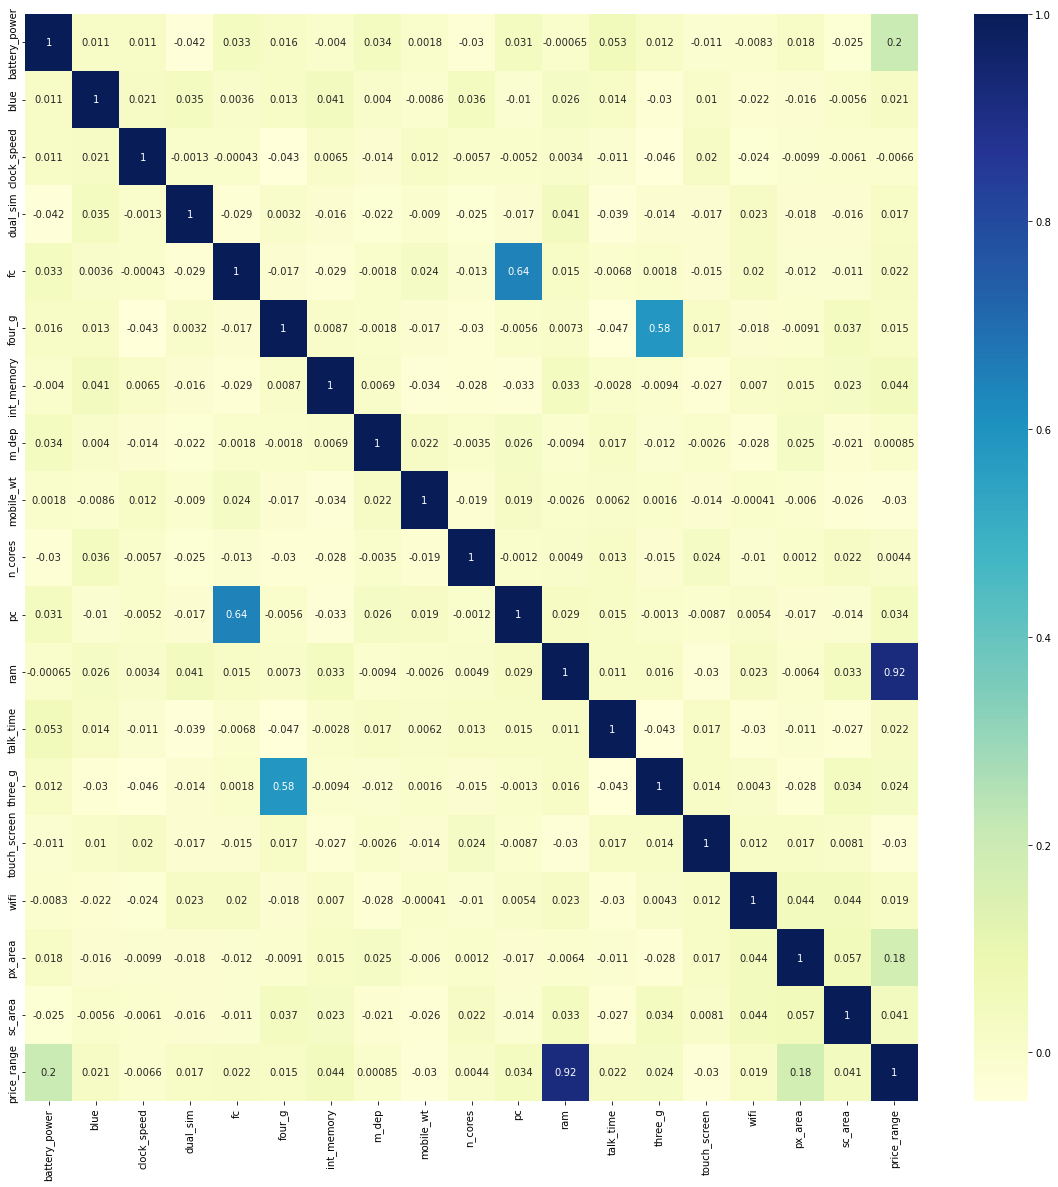

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

There are 2 more pairs with significant correlation namely `pc`-`fc` and `four_g`-`three_g`. These correlations are natural as well since mobile with good back camera also tends to have good front camera and phones which support 4G also supports 3G. I leave these columns as it is in order to prevent losing pontentially valuable information from the data. The pair `ram`-`price_range` can be ignored as `price_range` is the target variable.

Now we need to feature scaling in order to bring all the features to the same scale. Not doing so can make the model give more importance to features which have high values compared to others, hence making our model perform poorly. Before we scale the features we should look at their distributions.

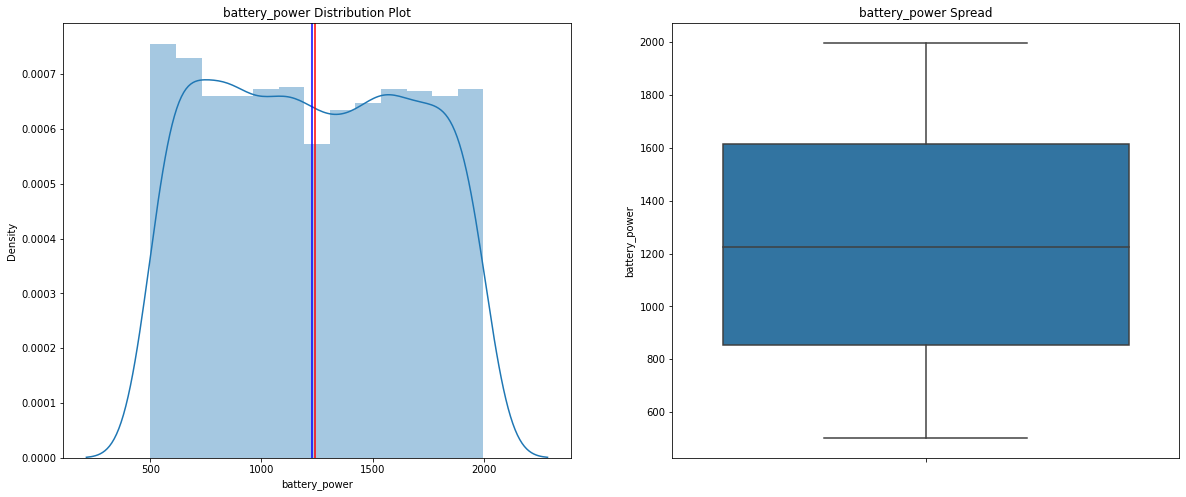

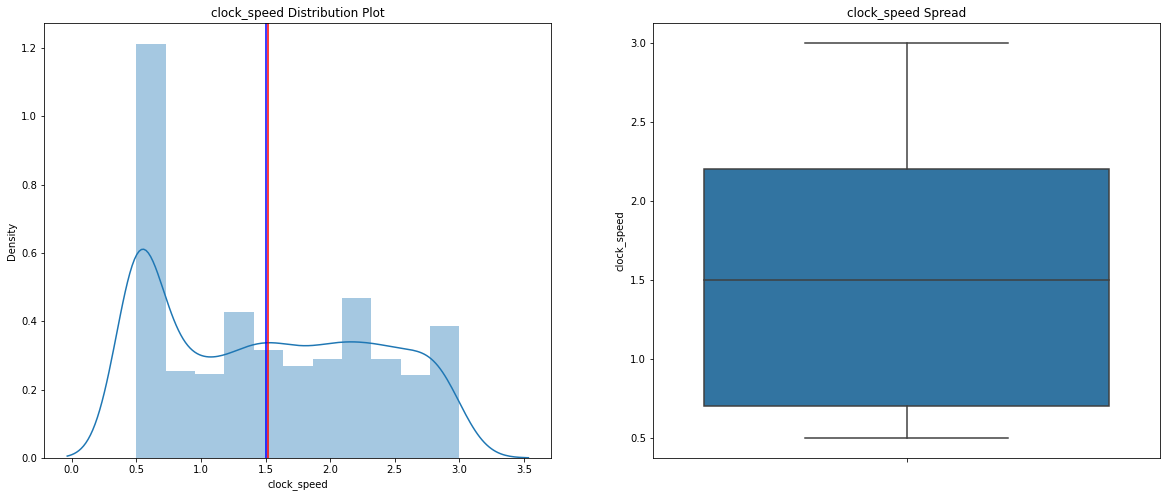

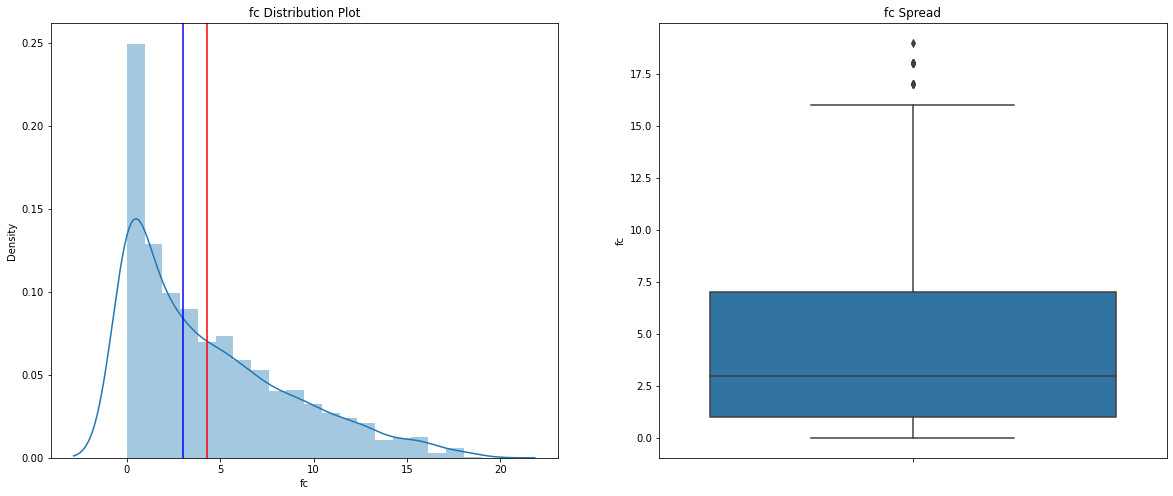

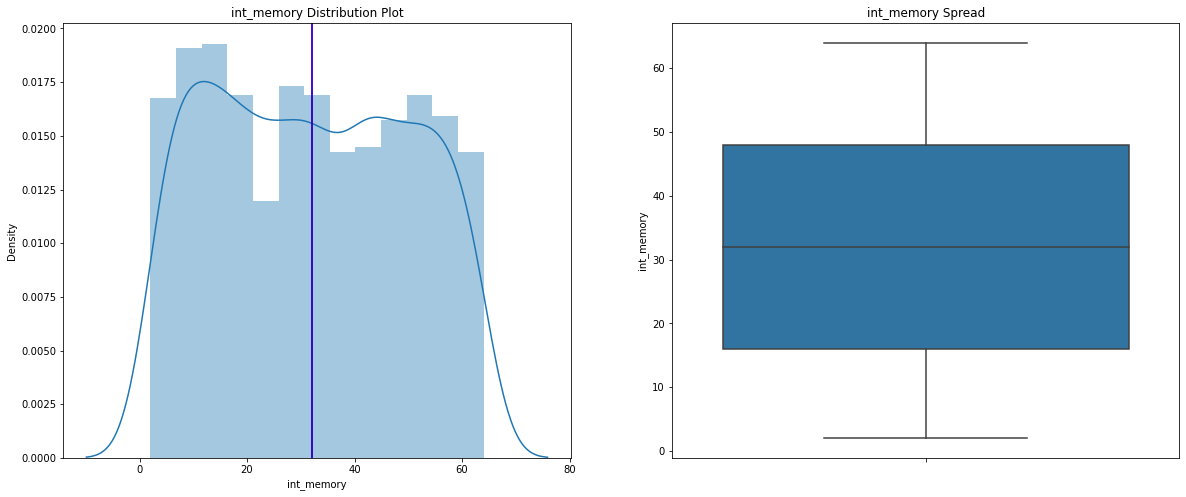

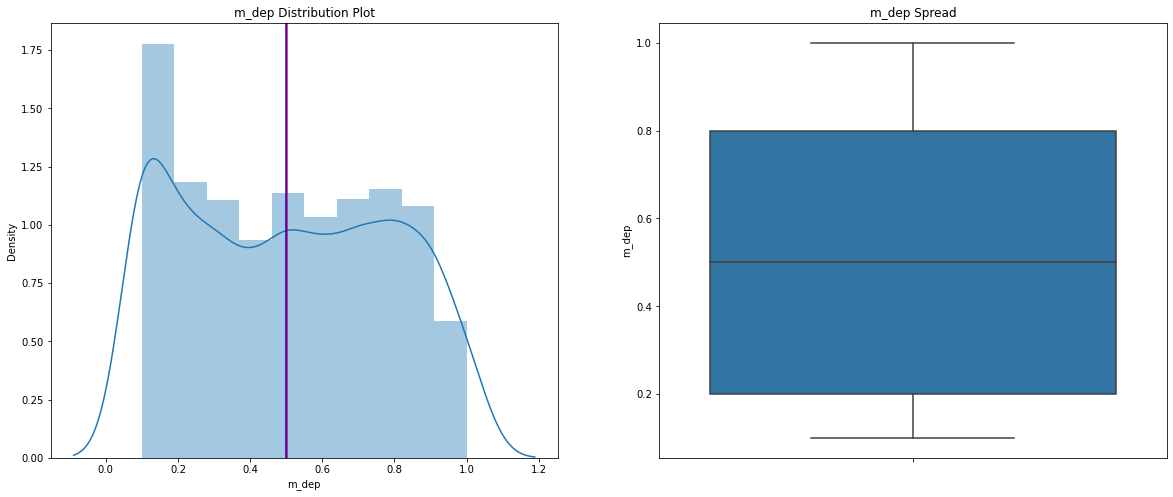

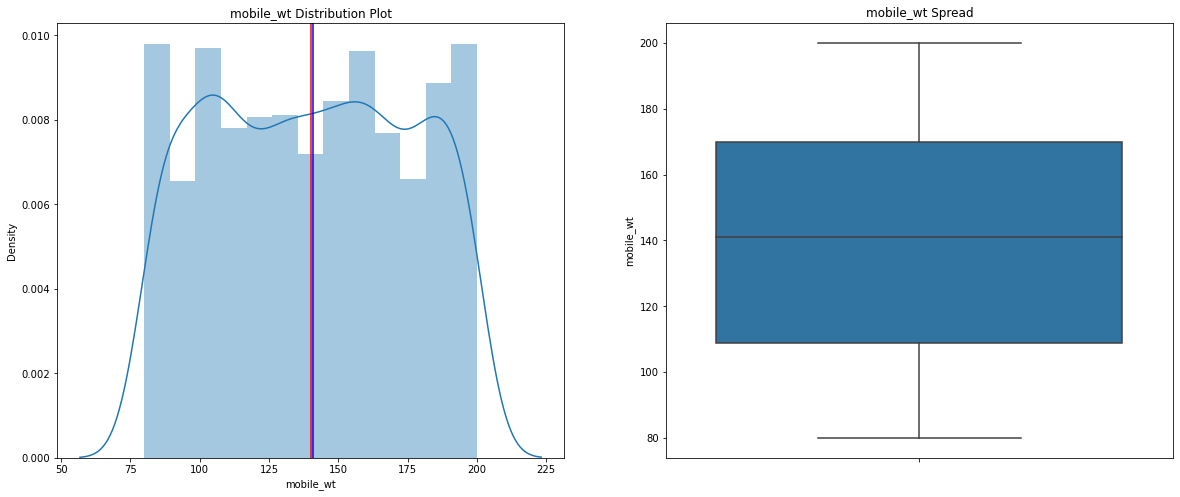

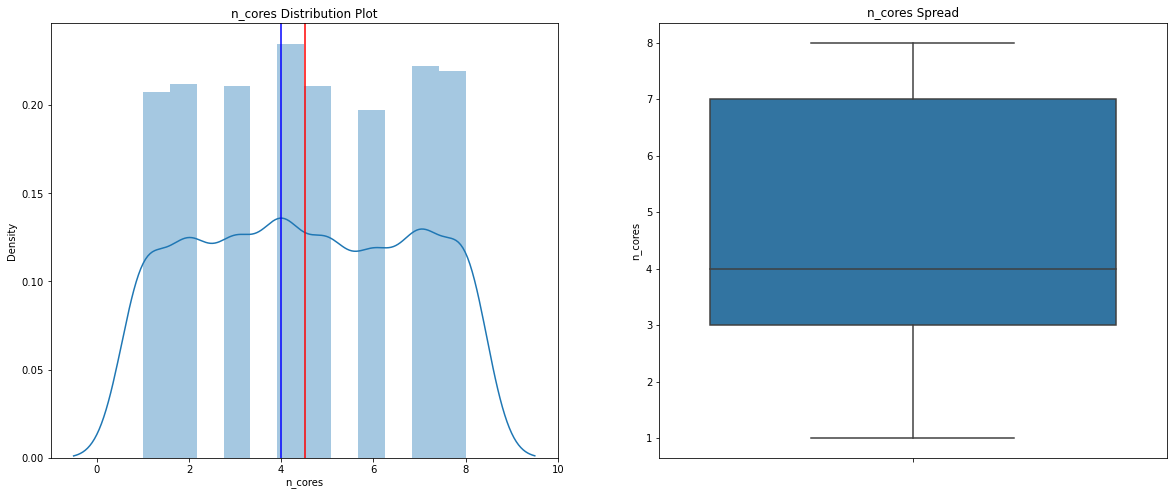

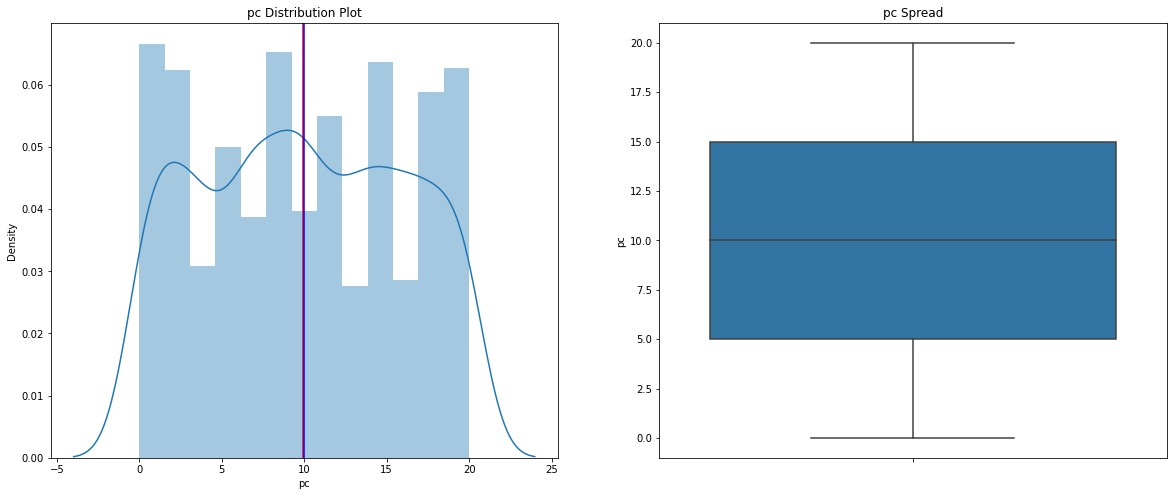

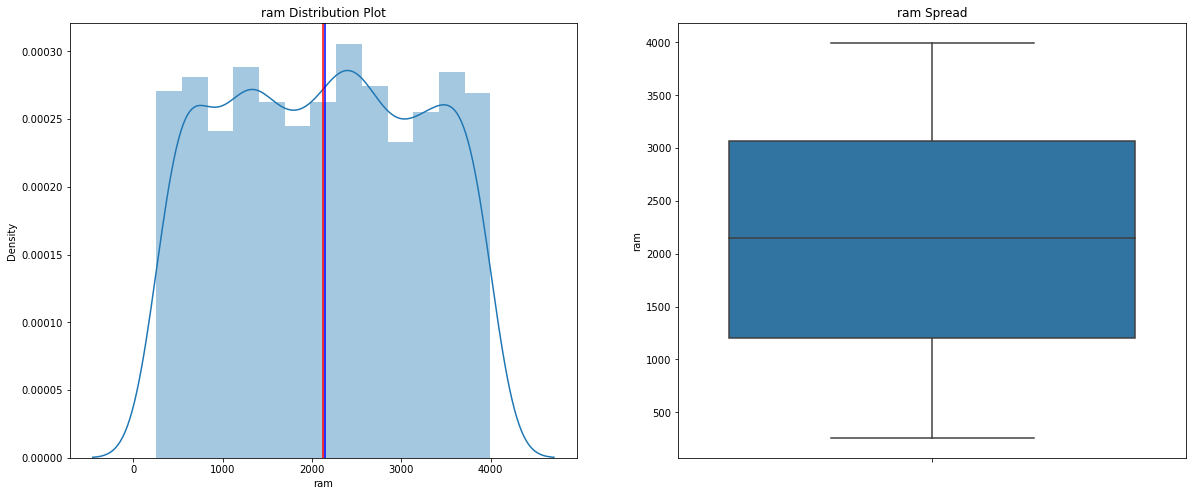

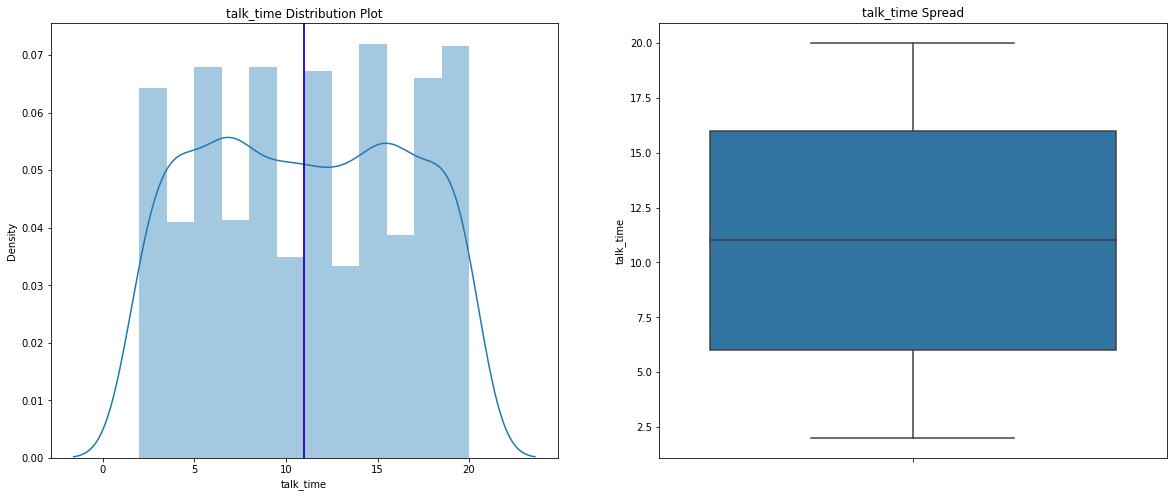

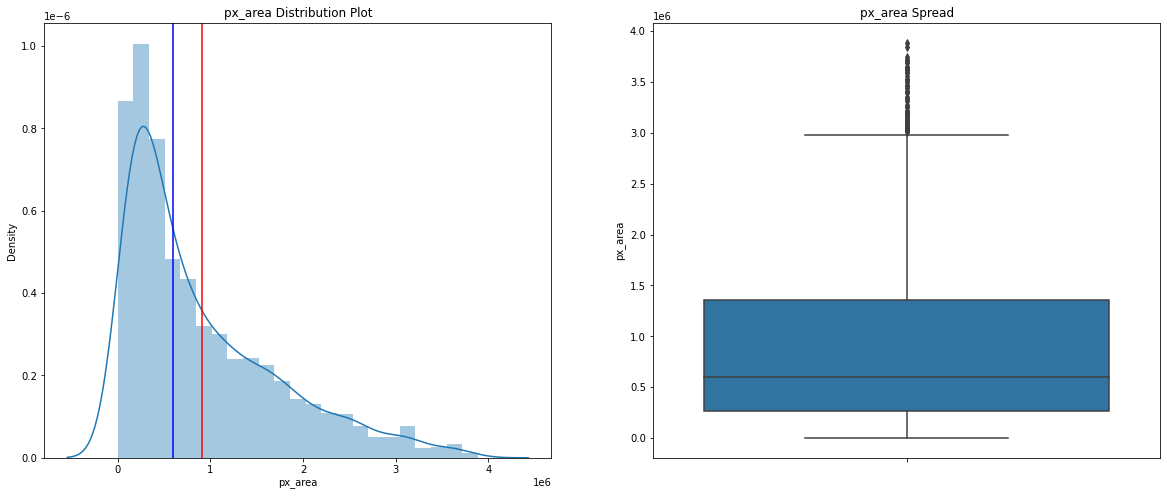

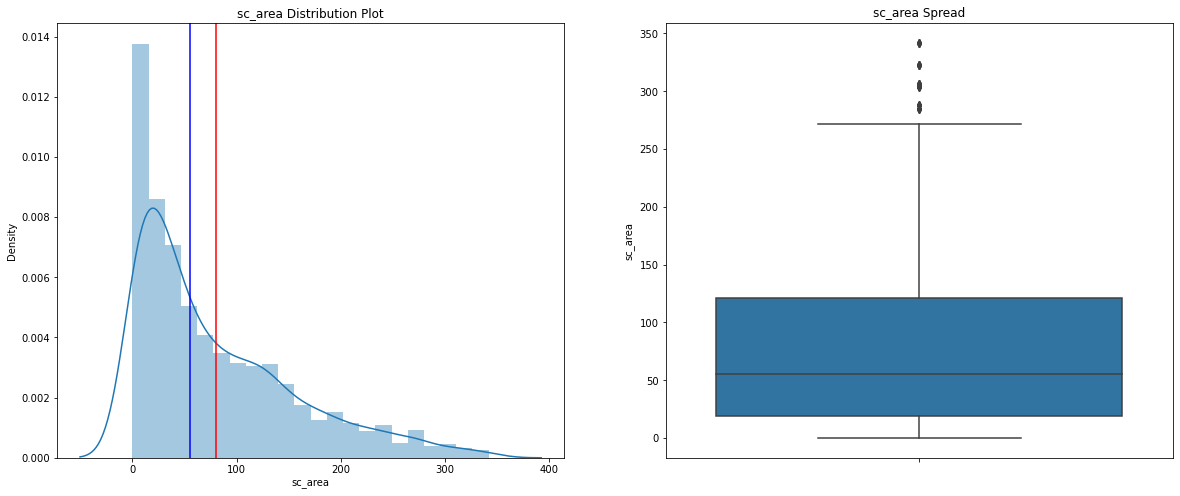

In [22]:
for column in num_variables:
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    plt.title(f'{column} Distribution Plot')
    sns.distplot(train_df[column])
    plt.axvline(train_df[column].mean(), color="r")
    plt.axvline(train_df[column].median(), color="b")

    plt.subplot(1, 2, 2)
    plt.title(f'{column} Spread')
    sns.boxplot(y=train_df[column])

    plt.show()

We can observe that all of the features are uniformly distributed except for `fc`, `px_area` and `sc_area` which are right skewed.

In [23]:
uniform_variables = ['battery_power', 'clock_speed', 'int_memory',
                     'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time']

skew_variables = ['fc', 'px_area', 'sc_area']

In [24]:
mobile_train = train_df.copy()
mobile_test = test_df.copy()

We can use `MinMaxScaler` to transform the uniform variables.

In [25]:
for column in uniform_variables:
    scaler = MinMaxScaler()
    train_df[column] = scaler.fit_transform(train_df[[column]])
    test_df[column] = scaler.transform(test_df[[column]])

To transform the skewed variables we use the `log(1+x)` transformation also known as `log1p` transformation to make these features more normally distributed.

In [26]:
for column in skew_variables:
    train_df[f'log1p_{column}'] = np.log1p(train_df[column])
    test_df[f'log1p_{column}'] = np.log1p(test_df[column])

train_df.drop(['fc', 'px_area', 'sc_area'], axis=1, inplace=True)
test_df.drop(['fc', 'px_area', 'sc_area'], axis=1, inplace=True)

Since these features still have higher values compared to other features we tone them down with `StandardScaler`.

In [27]:
for column in ['log1p_px_area', 'log1p_sc_area']:
    scaler = StandardScaler()
    train_df[column] = scaler.fit_transform(train_df[[column]])
    test_df[column] = scaler.transform(test_df[[column]])

In [28]:
num_variables.remove('px_area')
num_variables.remove('sc_area')
num_variables.remove('fc')

num_variables.append('log1p_px_area')
num_variables.append('log1p_sc_area')
num_variables.append('log1p_fc')
num_variables

['battery_power',
 'clock_speed',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'ram',
 'talk_time',
 'log1p_px_area',
 'log1p_sc_area',
 'log1p_fc']

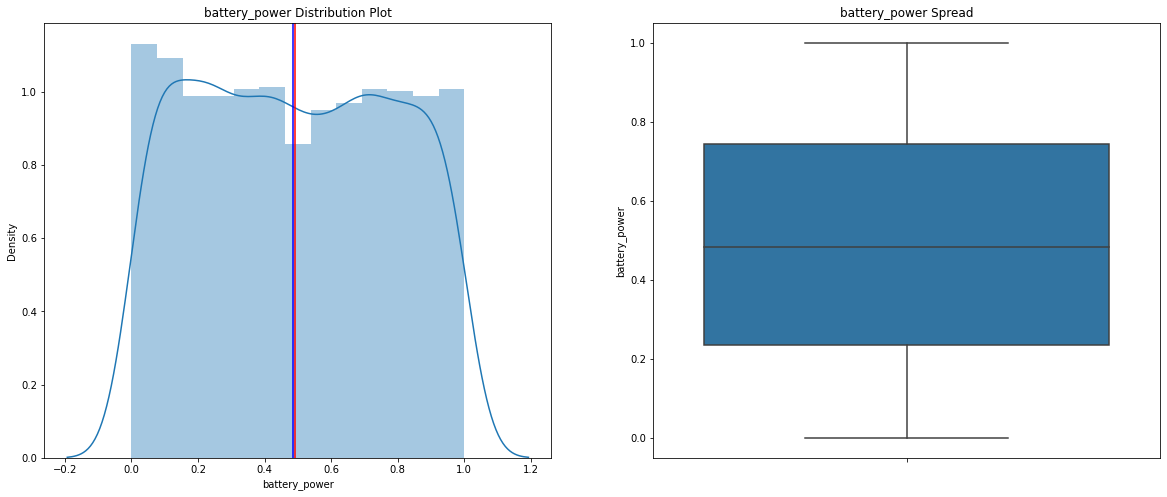

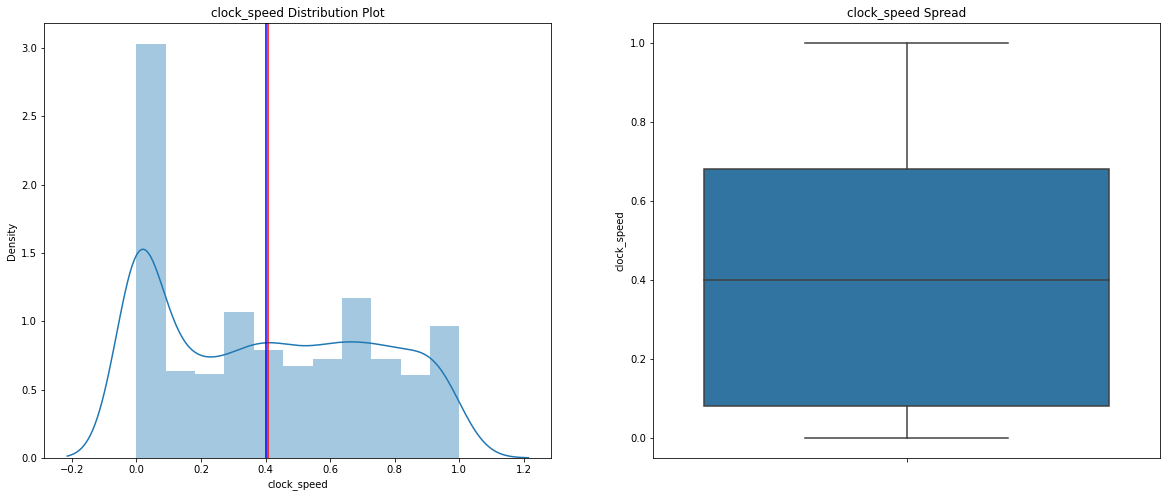

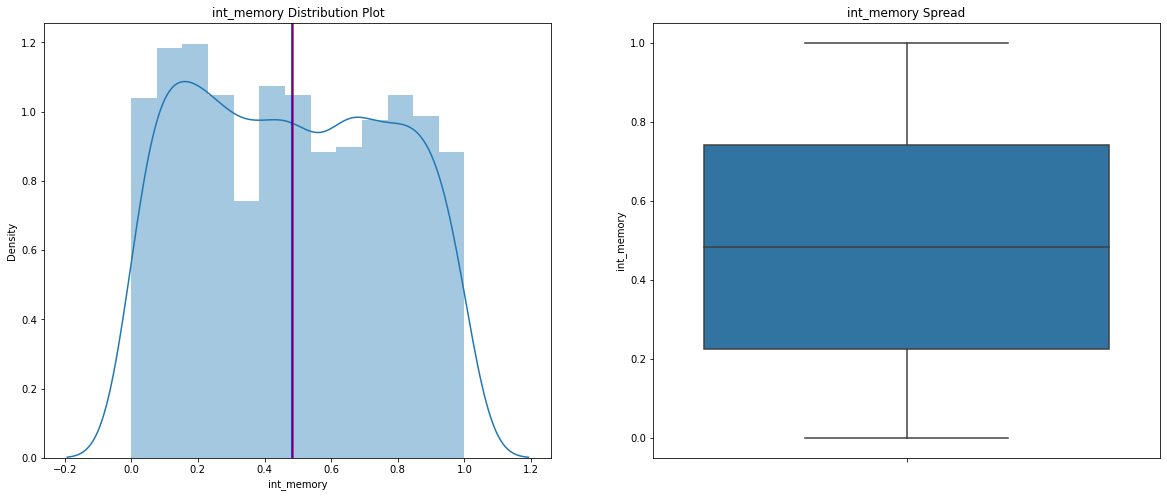

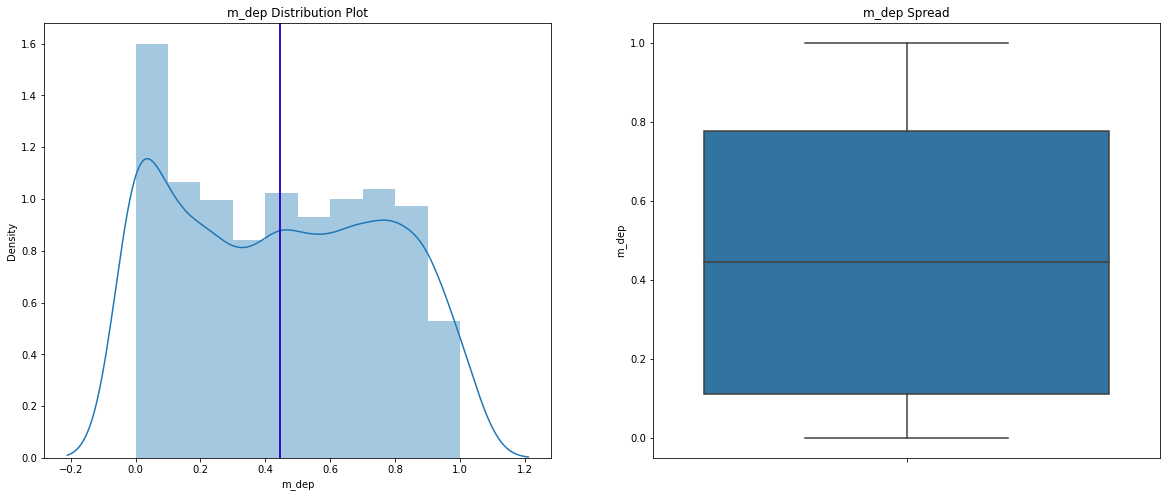

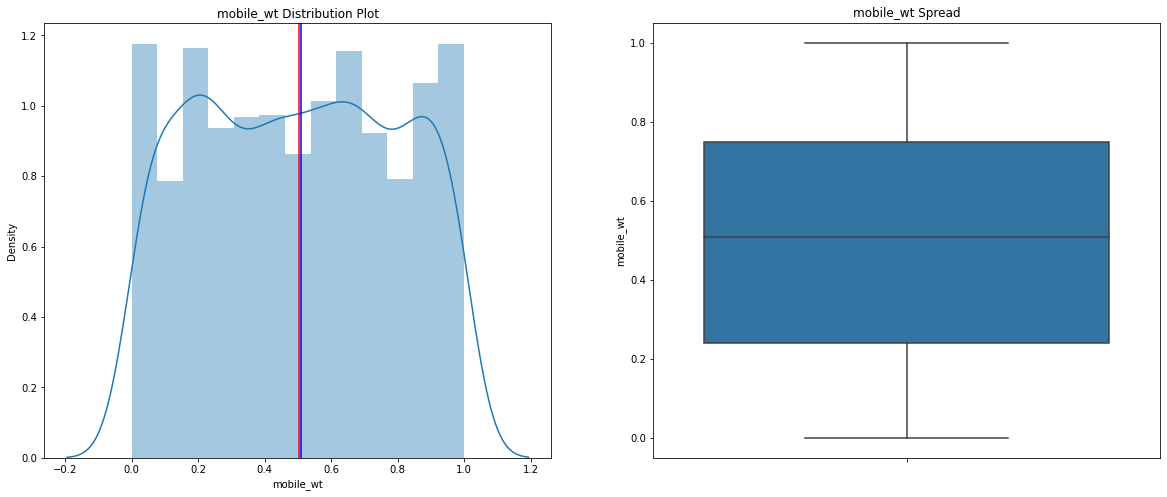

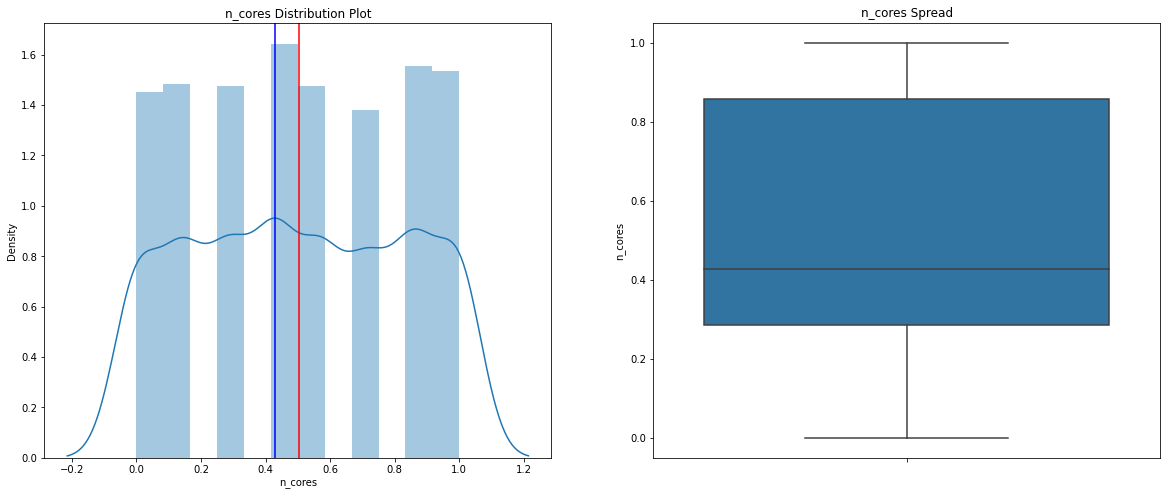

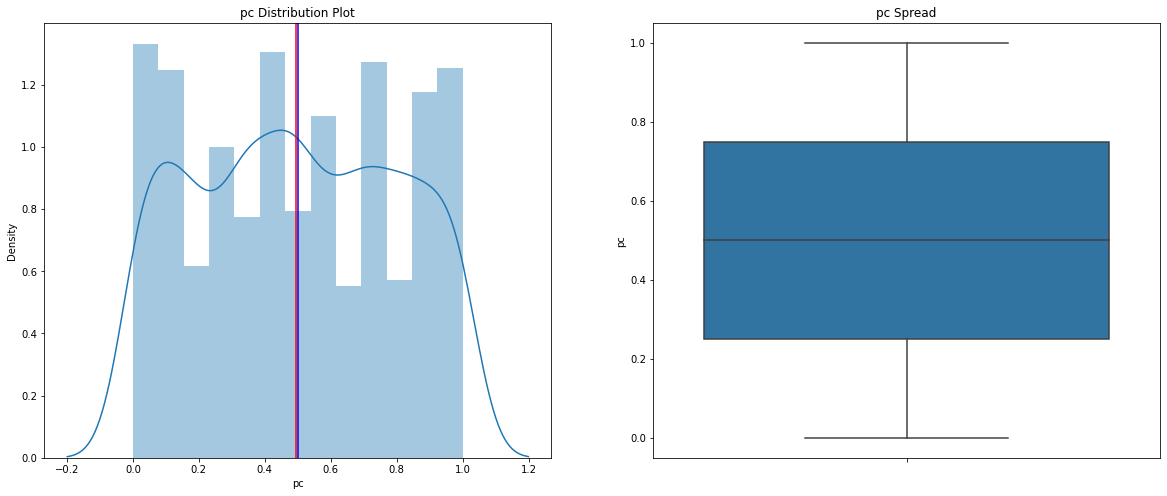

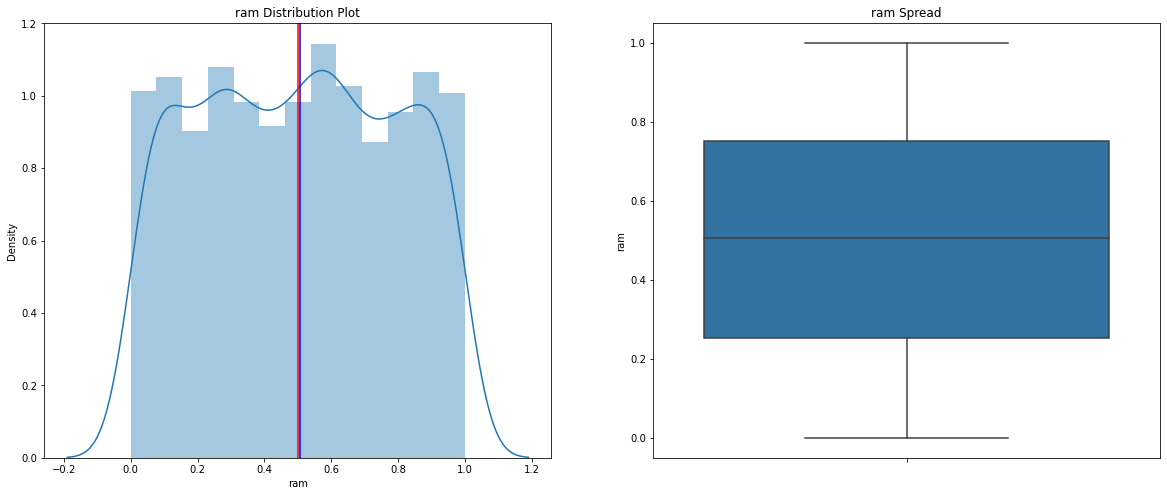

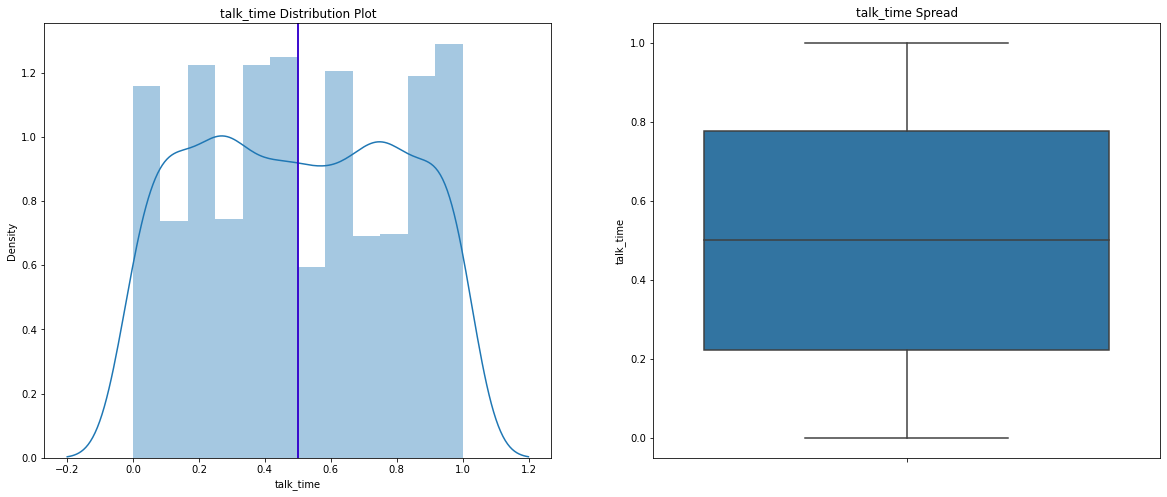

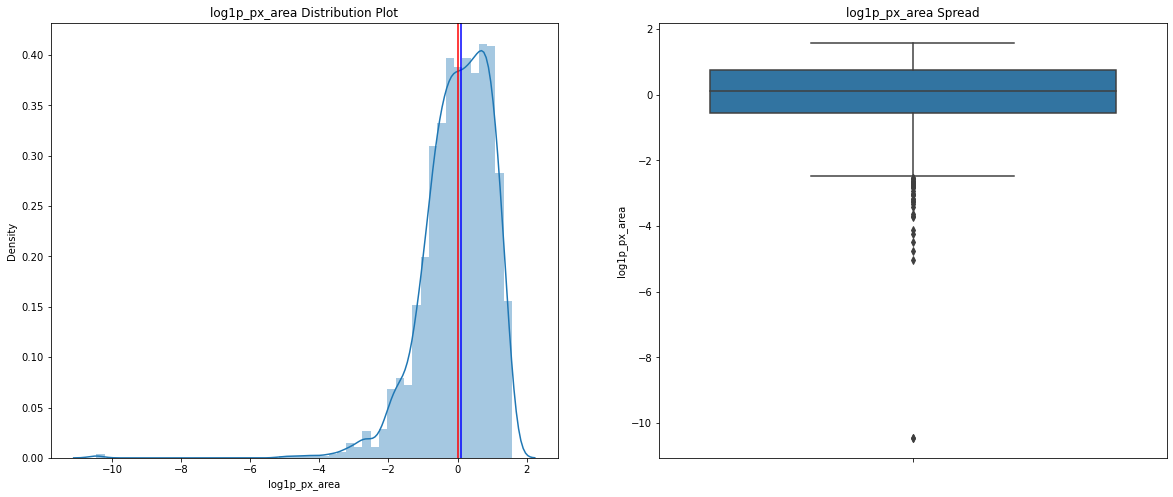

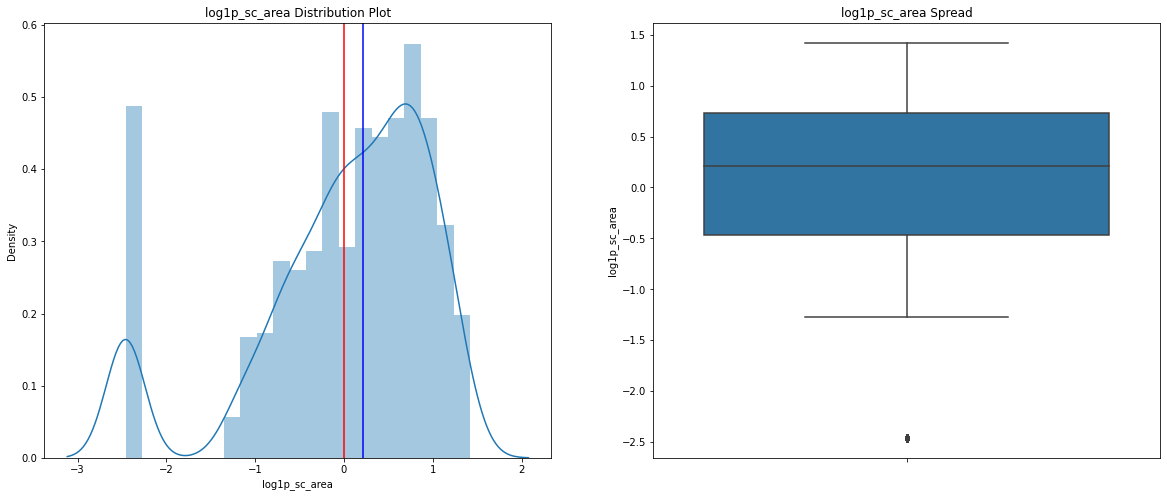

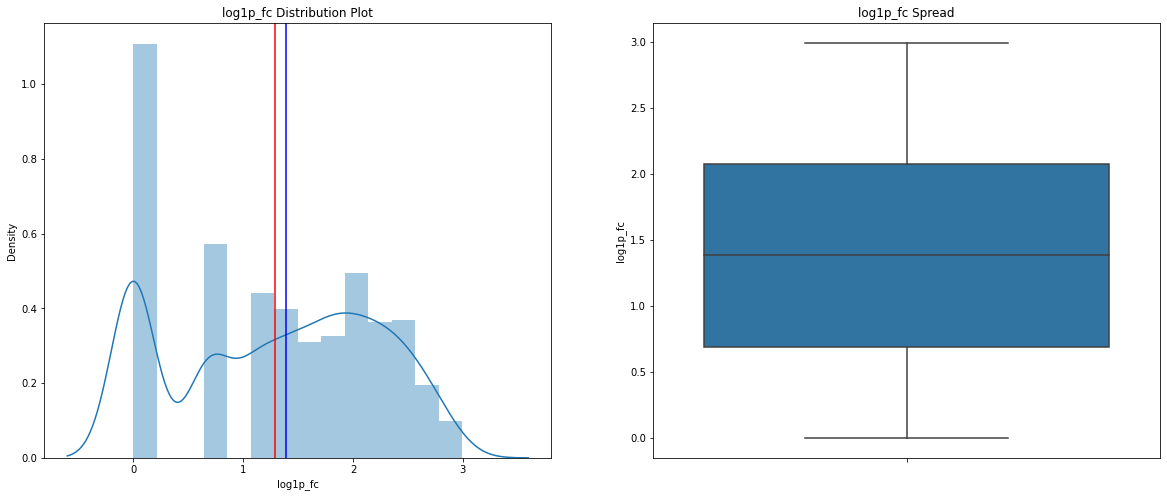

In [29]:
for column in num_variables:
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    plt.title(f'{column} Distribution Plot')
    sns.distplot(train_df[column])
    plt.axvline(train_df[column].mean(), color="r")
    plt.axvline(train_df[column].median(), color="b")

    plt.subplot(1, 2, 2)
    plt.title(f'{column} Spread')
    sns.boxplot(y=train_df[column])

    plt.show()

These distributions are acceptable for our model.

## Model Training

In this step we train our model using different algorithms and depending upon the performance we will select the best one as the final model.

In [30]:
new_column_order = list(train_df.columns.drop('price_range')) + ['price_range']
train_df = train_df[new_column_order]

train_df.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,log1p_fc,log1p_px_area,log1p_sc_area,price_range
0,0.227789,0,0.68,0,0,0.080645,0.555556,0.900000,0.142857,0.10,0.612774,0.944444,0,0,1,0.693147,-2.821787,0.304175,1
1,0.347361,1,0.00,1,1,0.822581,0.666667,0.466667,0.285714,0.30,0.634687,0.277778,1,1,0,0.000000,0.969803,0.166170,2
2,0.041416,1,0.00,1,1,0.629032,0.888889,0.541667,0.571429,0.30,0.627205,0.388889,1,1,0,1.098612,1.117513,-0.376006,2
3,0.076152,1,0.80,0,0,0.129032,0.777778,0.425000,0.714286,0.45,0.671566,0.500000,1,0,0,0.000000,1.119147,0.770038,2
4,0.881764,1,0.28,0,1,0.677419,0.555556,0.508333,0.142857,0.70,0.308658,0.722222,1,1,0,2.639057,0.806309,-0.576913,1


In [31]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,log1p_fc,log1p_px_area,log1p_sc_area,price_range
0,0.227789,0,0.68,0,0,0.080645,0.555556,0.900000,0.142857,0.10,0.612774,0.944444,0,0,1,0.693147,-2.821787,0.304175,1
1,0.347361,1,0.00,1,1,0.822581,0.666667,0.466667,0.285714,0.30,0.634687,0.277778,1,1,0,0.000000,0.969803,0.166170,2
2,0.041416,1,0.00,1,1,0.629032,0.888889,0.541667,0.571429,0.30,0.627205,0.388889,1,1,0,1.098612,1.117513,-0.376006,2
3,0.076152,1,0.80,0,0,0.129032,0.777778,0.425000,0.714286,0.45,0.671566,0.500000,1,0,0,0.000000,1.119147,0.770038,2
4,0.881764,1,0.28,0,1,0.677419,0.555556,0.508333,0.142857,0.70,0.308658,0.722222,1,1,0,2.639057,0.806309,-0.576913,1


In [32]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,log1p_fc,log1p_px_area,log1p_sc_area
0,1,0.362057,1,0.52,1,0,0.048387,0.000000,0.941667,0.285714,0.8,0.860502,0.000000,0,1,0,2.708050,-0.402379,0.492777
1,2,0.227121,1,0.00,1,1,0.951613,0.777778,0.925000,0.571429,0.6,0.972475,0.277778,1,0,0,1.609438,0.148919,-2.459968
2,3,0.872411,1,0.92,0,0,0.403226,0.888889,0.883333,0.285714,0.2,0.571887,0.444444,0,1,1,0.693147,0.940919,0.957366
3,4,0.698063,0,0.00,1,1,0.370968,0.444444,0.133333,1.000000,1.0,0.971940,0.277778,1,1,0,2.944439,-0.019814,-2.459968
4,5,0.623246,0,0.36,0,1,0.758065,0.444444,0.233333,0.714286,0.9,0.405398,0.277778,1,0,1,2.484907,0.107353,0.727486


We now split the dataset into input features `X` and target variable `y` for our model.

In [33]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

In [34]:
X

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,log1p_fc,log1p_px_area,log1p_sc_area
0,0.227789,0,0.68,0,0,0.080645,0.555556,0.900000,0.142857,0.10,0.612774,0.944444,0,0,1,0.693147,-2.821787,0.304175
1,0.347361,1,0.00,1,1,0.822581,0.666667,0.466667,0.285714,0.30,0.634687,0.277778,1,1,0,0.000000,0.969803,0.166170
2,0.041416,1,0.00,1,1,0.629032,0.888889,0.541667,0.571429,0.30,0.627205,0.388889,1,1,0,1.098612,1.117513,-0.376006
3,0.076152,1,0.80,0,0,0.129032,0.777778,0.425000,0.714286,0.45,0.671566,0.500000,1,0,0,0.000000,1.119147,0.770038
4,0.881764,1,0.28,0,1,0.677419,0.555556,0.508333,0.142857,0.70,0.308658,0.722222,1,1,0,2.639057,0.806309,-0.576913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1,0.00,1,1,0.000000,0.777778,0.216667,0.714286,0.70,0.110102,0.944444,1,1,0,0.000000,1.167957,0.178830
1996,0.977956,1,0.84,1,0,0.596774,0.111111,0.891667,0.428571,0.15,0.474613,0.777778,1,1,1,0.000000,0.969289,0.670155
1997,0.941884,0,0.16,1,1,0.548387,0.666667,0.233333,1.000000,0.15,0.748530,0.166667,1,1,0,0.693147,0.780130,-0.929588
1998,0.675351,0,0.16,0,1,0.709677,0.000000,0.541667,0.571429,0.25,0.163816,0.944444,1,1,1,1.609438,-0.679198,0.995140


In [35]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

We split our data into 3 parts:

`train` : Used to train our model

`validation` : Used to tune hyperparameters of our model

`test` : Used to check the performance of our model on unseen data

We can also use same data for both training and tuning hyperparameters but it can tend to overfit the model and give bad performance on unseen data. Hence I divided the data into 3 parts.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=100)

In [38]:
X_train.shape, X_val.shape, X_test.shape

((1200, 18), (400, 18), (400, 18))

In [39]:
y_train.shape, y_val.shape, y_test.shape

((1200,), (400,), (400,))

We can see `train` data has 1200 rows while `validation` and `test` set both have 400 rows each.

Now we begin with our model training.

### Logistic Regression

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

lr_score_train = accuracy_score(y_train, lr_pred_train)
lr_score_test = accuracy_score(y_test, lr_pred_test)

print("Train accuracy:", lr_score_train)
print("Test accuracy:", lr_score_test)

Train accuracy: 0.8983333333333333
Test accuracy: 0.84


In [41]:
lr_f1_train = f1_score(y_train, lr_pred_train, average='micro')
lr_f1_test = f1_score(y_test, lr_pred_test, average='micro')

print("Train f1 score:", lr_f1_train)
print("Test f1 score:", lr_f1_test)

Train f1 score: 0.8983333333333333
Test f1 score: 0.8399999999999999


Not bad for a base model. The accuracy and f1 score both are pretty decent.

In [42]:
lr_conf = confusion_matrix(y_test, lr_pred_test)
lr_conf

array([[97,  3,  0,  0],
       [15, 63, 21,  0],
       [ 0,  6, 80, 10],
       [ 1,  0,  8, 96]], dtype=int64)

This model is good at predicting the extreme price ranges but fails in predicting middle price ranges.

### Decision Tree

In [43]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

dc_pred_train = dc.predict(X_train)
dc_pred_test = dc.predict(X_test)

dc_score_train = accuracy_score(y_train, dc_pred_train)
dc_score_test = accuracy_score(y_test, dc_pred_test)

print("Train accuracy:", dc_score_train)
print("Test accuracy:", dc_score_test)

Train accuracy: 1.0
Test accuracy: 0.8275


In [44]:
dc_f1_train = f1_score(y_train, dc_pred_train, average='micro')
dc_f1_test = f1_score(y_test, dc_pred_test, average='micro')

print("Train f1 score:", dc_f1_train)
print("Test f1 score:", dc_f1_test)

Train f1 score: 1.0
Test f1 score: 0.8275


Looking at the difference in metrics for `train` and `test` set it seems the model has overfitted.

In [45]:
dc_conf = confusion_matrix(y_test, dc_pred_test)
dc_conf

array([[89, 11,  0,  0],
       [ 6, 80, 13,  0],
       [ 0, 12, 75,  9],
       [ 0,  0, 18, 87]], dtype=int64)

### Random Forest

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

rfc_score_train = accuracy_score(y_train, rfc_pred_train)
rfc_score_test = accuracy_score(y_test, rfc_pred_test)

print("Train accuracy:", rfc_score_train)
print("Test accuracy:", rfc_score_test)

Train accuracy: 1.0
Test accuracy: 0.87


In [47]:
rfc_f1_train = f1_score(y_train, rfc_pred_train, average='micro')
rfc_f1_test = f1_score(y_test, rfc_pred_test, average='micro')

print("Train f1 score:", rfc_f1_train)
print("Test f1 score:", rfc_f1_test)

Train f1 score: 1.0
Test f1 score: 0.87


Looking at the difference in metrics for `train` and `test` set it seems the model has overfitted.

In [48]:
rfc_conf = confusion_matrix(y_test, rfc_pred_test)
rfc_conf

array([[95,  5,  0,  0],
       [ 7, 77, 15,  0],
       [ 0,  9, 78,  9],
       [ 0,  0,  7, 98]], dtype=int64)

### SVM

In [49]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)

svc_score_train = accuracy_score(y_train, svc_pred_train)
svc_score_test = accuracy_score(y_test, svc_pred_test)

print("Train accuracy:", svc_score_train)
print("Test accuracy:", svc_score_test)

Train accuracy: 0.9258333333333333
Test accuracy: 0.755


In [50]:
svc_f1_train = f1_score(y_train, svc_pred_train, average='micro')
svc_f1_test = f1_score(y_test, svc_pred_test, average='micro')

print("Train f1 score:", svc_f1_train)
print("Test f1 score:", svc_f1_test)

Train f1 score: 0.9258333333333333
Test f1 score: 0.755


Looking at the difference in metrics for `train` and `test` set it seems the model has overfitted.

In [51]:
svc_conf = confusion_matrix(y_test, svc_pred_test)
svc_conf

array([[87, 13,  0,  0],
       [13, 65, 21,  0],
       [ 0, 14, 70, 12],
       [ 0,  0, 25, 80]], dtype=int64)

### KNN

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

knn_score_train = accuracy_score(y_train, knn_pred_train)
knn_score_test = accuracy_score(y_test, knn_pred_test)

print("Train accuracy:", knn_score_train)
print("Test accuracy:", knn_score_test)

Train accuracy: 0.5941666666666666
Test accuracy: 0.3925


In [53]:
knn_f1_train = f1_score(y_train, knn_pred_train, average='micro')
knn_f1_test = f1_score(y_test, knn_pred_test, average='micro')

print("Train f1 score:", knn_f1_train)
print("Test f1 score:", knn_f1_test)

Train f1 score: 0.5941666666666666
Test f1 score: 0.3925


This model has performed really poorly.

In [54]:
knn_conf = confusion_matrix(y_test, knn_pred_test)
knn_conf

array([[54, 24, 18,  4],
       [36, 34, 17, 12],
       [29, 17, 34, 16],
       [13, 23, 34, 35]], dtype=int64)

### NB

In [55]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)

nb_score_train = accuracy_score(y_train, nb_pred_train)
nb_score_test = accuracy_score(y_test, nb_pred_test)

print("Train accuracy:", nb_score_train)
print("Test accuracy:", nb_score_test)

Train accuracy: 0.8033333333333333
Test accuracy: 0.7475


In [56]:
nb_f1_train = f1_score(y_train, nb_pred_train, average='micro')
nb_f1_test = f1_score(y_test, nb_pred_test, average='micro')

print("Train f1 score:", nb_f1_train)
print("Test f1 score:", nb_f1_test)

Train f1 score: 0.8033333333333333
Test f1 score: 0.7475


Decent metrics which can be improved by some hyperparameter tuning.

In [57]:
nb_conf = confusion_matrix(y_test, nb_pred_test)
nb_conf

array([[87, 13,  0,  0],
       [13, 56, 30,  0],
       [ 0, 20, 59, 17],
       [ 0,  0,  8, 97]], dtype=int64)

## Hyperparameter Tuning

In this step, we will tune the hyperparameters of the promising models found in the previous stage namely `LogisticRegression`, `SVC`, `GaussianNB`, `DecisionTreeClassifier` and `RandomForestClassifier`.

### Logistic Regression

In [58]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', None, 'elasticnet'],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

svc = LogisticRegression()

grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}


In [59]:
lr = LogisticRegression(C=1, penalty='l1', solver='saga', class_weight=None)
lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

lr_score_train = accuracy_score(y_train, lr_pred_train)
lr_score_test = accuracy_score(y_test, lr_pred_test)

print("Train accuracy:", lr_score_train)
print("Test accuracy:", lr_score_test)

Train accuracy: 0.9316666666666666
Test accuracy: 0.88


These are really good metrics. Let us check for other models as well before deciding which model to choose as the final model.

In [60]:
lr_conf = confusion_matrix(y_test, lr_pred_test)
lr_conf

array([[96,  4,  0,  0],
       [ 9, 75, 15,  0],
       [ 0,  5, 83,  8],
       [ 0,  1,  6, 98]], dtype=int64)

#### SVM

In [61]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None, 'balanced'],
    'random_state': [100]
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 100}


In [62]:
svc = SVC(C=10, class_weight=None, gamma='scale',
          kernel='linear', random_state=100)
svc.fit(X_train, y_train)

svc_pred_train = svc.predict(X_train)
svc_pred_test = svc.predict(X_test)

svc_score_train = accuracy_score(y_train, svc_pred_train)
svc_score_test = accuracy_score(y_test, svc_pred_test)

print("Train accuracy:", svc_score_train)
print("Test accuracy:", svc_score_test)

Train accuracy: 0.935
Test accuracy: 0.8675


This model is slightly overfitting but still good enough.

In [63]:
svc_conf = confusion_matrix(y_test, svc_pred_test)
svc_conf

array([[93,  7,  0,  0],
       [ 9, 78, 12,  0],
       [ 0,  4, 82, 10],
       [ 0,  1, 10, 94]], dtype=int64)

#### Naive Bayes

In [64]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb = GaussianNB()

grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'var_smoothing': 1e-09}


In [65]:
nb = GaussianNB(var_smoothing=1e-09)
nb.fit(X_train, y_train)

nb_pred_train = nb.predict(X_train)
nb_pred_test = nb.predict(X_test)

nb_score_train = accuracy_score(y_train, nb_pred_train)
nb_score_test = accuracy_score(y_test, nb_pred_test)

print("Train accuracy:", nb_score_train)
print("Test accuracy:", nb_score_test)

Train accuracy: 0.8033333333333333
Test accuracy: 0.7475


Compared to our previous models these metrics are really poor.

In [66]:
nb_conf = confusion_matrix(y_test, nb_pred_test)
nb_conf

array([[87, 13,  0,  0],
       [13, 56, 30,  0],
       [ 0, 20, 59, 17],
       [ 0,  0,  8, 97]], dtype=int64)

#### Decision Tree

In [67]:
param_grid = {
    'max_depth': [2, 5, 7, 10],
    'min_samples_split': [5, 10, 25, 50, 75, 100],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced'],
    'random_state': [100]
}

dc = DecisionTreeClassifier()

grid_search = GridSearchCV(dc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 100}


In [68]:
dc = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7, max_features='auto', min_samples_leaf=5,
                            min_samples_split=5, random_state=100)
dc.fit(X_train, y_train)

dc_pred_train = dc.predict(X_train)
dc_pred_test = dc.predict(X_test)

dc_score_train = accuracy_score(y_train, dc_pred_train)
dc_score_test = accuracy_score(y_test, dc_pred_test)

print("Train accuracy:", dc_score_train)
print("Test accuracy:", dc_score_test)

Train accuracy: 0.8758333333333334
Test accuracy: 0.7625


Again, the decision tree has overfitted.

In [69]:
dc_conf = confusion_matrix(y_test, dc_pred_test)
dc_conf

array([[84, 16,  0,  0],
       [10, 70, 18,  1],
       [ 2, 15, 71,  8],
       [ 0,  0, 25, 80]], dtype=int64)

#### Random Forest

In [70]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', None],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'random_state': [100]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': None, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 100}


In [71]:
rfc = RandomForestClassifier(class_weight=None, max_depth=7, max_features=None, min_samples_leaf=1,
                             min_samples_split=2, random_state=100)
rfc.fit(X_train, y_train)

rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)

rfc_score_train = accuracy_score(y_train, rfc_pred_train)
rfc_score_test = accuracy_score(y_test, rfc_pred_test)

print("Train accuracy:", rfc_score_train)
print("Test accuracy:", rfc_score_test)

Train accuracy: 0.985
Test accuracy: 0.86


The model has clearly overfitted but it has decent test accuracy compared to other models.

In [72]:
rfc_conf = confusion_matrix(y_test, rfc_pred_test)
rfc_conf

array([[92,  8,  0,  0],
       [ 8, 78, 13,  0],
       [ 0,  7, 78, 11],
       [ 0,  0,  9, 96]], dtype=int64)

### Some Additional Models

#### SGDC

In [73]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber',
             'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'class_weight': [None, 'balanced'],
}

sgd = SGDClassifier()

grid_search = GridSearchCV(sgd, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.001, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'penalty': 'l1'}


In [74]:
sgd = SGDClassifier(alpha=0.01, class_weight='balanced',
                    loss='squared_hinge', penalty='l1')
sgd.fit(X_train, y_train)

sgd_pred_train = sgd.predict(X_train)
sgd_pred_test = sgd.predict(X_test)

sgd_score_train = accuracy_score(y_train, sgd_pred_train)
sgd_score_test = accuracy_score(y_test, sgd_pred_test)

print("Train accuracy:", sgd_score_train)
print("Test accuracy:", sgd_score_test)

Train accuracy: 0.7425
Test accuracy: 0.7275


Really poor performance compared to our other models.

In [75]:
sgd_conf = confusion_matrix(y_test, sgd_pred_test)
sgd_conf

array([[93,  7,  0,  0],
       [ 9, 89,  1,  0],
       [ 0, 73, 14,  9],
       [ 0,  3,  7, 95]], dtype=int64)

#### XGBoost

This is a really powerful model which has won many Data Science competitions. Let us see how this model performs here.

In [76]:
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'sampling_method': ['uniform', 'gradient_based'],
    'max_depth': [3, 5, 7],
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'random_state': [100]
}

xgboost = xgb.XGBClassifier()
grid_search = GridSearchCV(xgboost, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'booster': 'gbtree', 'max_depth': 7, 'random_state': 100, 'sampling_method': 'uniform', 'tree_method': 'auto'}


In [77]:
xgboost = xgb.XGBClassifier(booster='gbtree', max_depth=7,
                            random_state=100, sampling_method='uniform', tree_method='auto')
xgboost.fit(X_train, y_train)

xgboost_pred_train = xgboost.predict(X_train)
xgboost_pred_test = xgboost.predict(X_test)

xgboost_score_train = accuracy_score(y_train, xgboost_pred_train)
xgboost_score_test = accuracy_score(y_test, xgboost_pred_test)

print("Train accuracy:", xgboost_score_train)
print("Test accuracy:", xgboost_score_test)

Train accuracy: 1.0
Test accuracy: 0.88


The model has overfitted. The potential reason may be the algorithm is too complex for this data and not enough data was used for training.

In [78]:
xgboost_conf = confusion_matrix(y_test, xgboost_pred_test)
xgboost_conf

array([[92,  8,  0,  0],
       [ 4, 82, 13,  0],
       [ 0,  4, 82, 10],
       [ 0,  0,  9, 96]], dtype=int64)

#### AdaBoost

In [79]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'base_estimator': [None, lr, nb, knn, svc, sgd],
    'random_state': [100]
}

ada = AdaBoostClassifier()

grid_search = GridSearchCV(ada, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_val, y_val)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'base_estimator': GaussianNB(), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 100}


In [80]:
ada = AdaBoostClassifier(base_estimator=GaussianNB(
), learning_rate=0.01, n_estimators=50, random_state=100)
ada.fit(X_train, y_train)

ada_pred_train = ada.predict(X_train)
ada_pred_test = ada.predict(X_test)

ada_score_train = accuracy_score(y_train, ada_pred_train)
ada_score_test = accuracy_score(y_test, ada_pred_test)

print("Train accuracy:", ada_score_train)
print("Test accuracy:", ada_score_test)

Train accuracy: 0.8358333333333333
Test accuracy: 0.7775


Not good enough metrics.

In [81]:
ada_conf = confusion_matrix(y_test, ada_pred_test)
ada_conf

array([[85, 15,  0,  0],
       [11, 63, 25,  0],
       [ 0, 11, 71, 14],
       [ 0,  0, 13, 92]], dtype=int64)

### Final Model

#### Stacking Model with Logistic Regression, Random Forest and SVM

After trying out all the models, I decided to use `LogisticRegression`, `RandomForestClassifier` and `SVC` together for making the final predictions. The advantage of using multiple models is that we will get good performance on unseen data as chance for overfitting is reduced.

In [82]:
estimators = [
    ('logistic_regression', lr),
    ('random_forest', rfc),
    ('svm', svc)
]

stack = StackingClassifier(estimators=estimators,
                           stack_method='predict', n_jobs=-1)
stack.fit(X_train, y_train)

stack_pred_train = stack.predict(X_train)
stack_pred_test = stack.predict(X_test)

stack_score_train = accuracy_score(y_train, stack_pred_train)
stack_score_test = accuracy_score(y_test, stack_pred_test)

print("Train accuracy:", stack_score_train)
print("Test accuracy:", stack_score_test)

Train accuracy: 0.9475
Test accuracy: 0.8775


This seems like a good balance between train and test accuracy.

In [83]:
stack_conf = confusion_matrix(y_test, stack_pred_test)
stack_conf

array([[94,  6,  0,  0],
       [ 9, 78, 12,  0],
       [ 0,  5, 82,  9],
       [ 0,  0,  8, 97]], dtype=int64)

Let us now predict the `price_range` for `test` dataset.

In [84]:
mobile_test['price_range'] = lr.predict(np.array(test_df.iloc[:, 1:]))
mobile_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,px_area,sc_area,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,3476,2,0,1,0,319112,84,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,3895,7,1,0,0,639322,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,2396,10,0,1,1,1734820,170,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,3893,7,1,1,0,516840,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,1773,7,1,0,1,606690,120,1


### Feature Importance

Let us see the indiviual feature importance for each model. First up, `LogisticRegression`.

In [85]:
lr_imp = abs(lr.coef_[0])
lr_imp /= lr_imp.sum()

lr_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Logistic Regression Importance': lr_imp
})
lr_df = lr_df.sort_values(by='Logistic Regression Importance', ascending=False)
lr_df.reset_index(drop=True, inplace=True)
lr_df['Logistic Regression Rank'] = lr_df.index + 1
lr_df

,Feature,Logistic Regression Importance,Logistic Regression Rank
0,ram,0.742553,1
1,battery_power,0.164938,2
2,log1p_px_area,0.050147,3
3,clock_speed,0.010778,4
4,int_memory,0.008587,5
5,m_dep,0.006963,6
6,mobile_wt,0.006414,7
7,n_cores,0.004815,8
8,wifi,0.002264,9
9,log1p_fc,0.001601,10


Now let us check for `RandomForestClassifier`.

In [86]:
rfc_imp = rfc.feature_importances_

rfc_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rfc_imp
})
rfc_df = rfc_df.sort_values(by='Random Forest Importance', ascending=False)
rfc_df.reset_index(drop=True, inplace=True)
rfc_df['Random Forest Rank'] = rfc_df.index + 1
rfc_df

,Feature,Random Forest Importance,Random Forest Rank
0,ram,0.679953,1
1,battery_power,0.135988,2
2,log1p_px_area,0.118597,3
3,mobile_wt,0.013694,4
4,int_memory,0.008271,5
5,talk_time,0.007444,6
6,log1p_sc_area,0.007152,7
7,m_dep,0.006628,8
8,pc,0.006104,9
9,log1p_fc,0.004448,10


Finally, for `SVC`.

In [87]:
svc_imp = abs(svc.coef_[0])
svc_imp /= svc_imp.sum()

svc_df = pd.DataFrame({
    'Feature': X_train.columns,
    'SVM Importance': svc_imp
})
svc_df = svc_df.sort_values(by='SVM Importance', ascending=False)
svc_df.reset_index(drop=True, inplace=True)
svc_df['SVM Rank'] = svc_df.index + 1
svc_df

,Feature,SVM Importance,SVM Rank
0,ram,0.680314,1
1,battery_power,0.172948,2
2,log1p_px_area,0.041497,3
3,int_memory,0.025558,4
4,n_cores,0.015833,5
5,mobile_wt,0.014841,6
6,m_dep,0.013831,7
7,clock_speed,0.010382,8
8,talk_time,0.007671,9
9,touch_screen,0.004337,10


Now let us combine these importance to calculate the final feature importance of our model.

In [89]:
merged_df = pd.merge(lr_df, rfc_df, on='Feature')
merged_df = pd.merge(merged_df, svc_df, on='Feature')

com_imp = (merged_df['Logistic Regression Importance'] +
           merged_df['Random Forest Importance'] + merged_df['SVM Importance'])/3

com_df = pd.DataFrame({
    'Feature': merged_df['Feature'],
    'Combined Importance': com_imp
})
com_df = com_df.sort_values(by='Combined Importance', ascending=False)
com_df.reset_index(drop=True, inplace=True)
com_df['Overall Rank'] = com_df.index + 1
com_df

,Feature,Combined Importance,Overall Rank
0,ram,0.700940,1
1,battery_power,0.157958,2
2,log1p_px_area,0.070080,3
3,int_memory,0.014139,4
4,mobile_wt,0.011650,5
5,m_dep,0.009141,6
6,clock_speed,0.008324,7
7,n_cores,0.008124,8
8,talk_time,0.005039,9
9,log1p_sc_area,0.003256,10


The top 3 important features are `ram`, `battery_power` and `px_area`. Whereas `four_g`, `three_g` and `dual_sim` are the least important features.

### Preparing final dataset

Let us now merge the both the `train` and `test` dataset to create a final dataset which we will use for calculating the rankings of the mobile phones.

In [90]:
mobile_test.drop(['id'], axis=1, inplace=True)
mobile_test.shape

(1000, 19)

In [91]:
mobile_train.shape

(2000, 19)

In [92]:
mobile_df = pd.concat([mobile_train, mobile_test], axis=0, ignore_index=True)
mobile_df.shape

(3000, 19)

In [93]:
mobile_df.insert(0, 'id', range(1, len(mobile_df) + 1))
mobile_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,px_area,sc_area,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,15120,63,1
1,2,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,1799140,51,2
2,3,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2167308,22,2
3,4,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2171776,128,2
4,5,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1464096,16,1


In [94]:
mobile_df.to_csv('mobile.csv', index=False)

Now we have all the data in the csv file which we will use in the subsequent notebook.